In [11]:
#importing the dependencies

#importing numpy for mathematical operation
import numpy as np

#importing the pandas for handling the data 
import pandas as pd

#importing matplotlib for plotting purpose
import matplotlib.pyplot as plt

#importing folium for plotting latitude and longitude on the geographical map
import folium
import os

#importing seaborn for drawing the countplot and barplot
import seaborn as sns

print(os.listdir('../input'))

['Chicago_Crimes_2012_to_2017.csv']


In [12]:
#reading in the data
data = pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv')
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


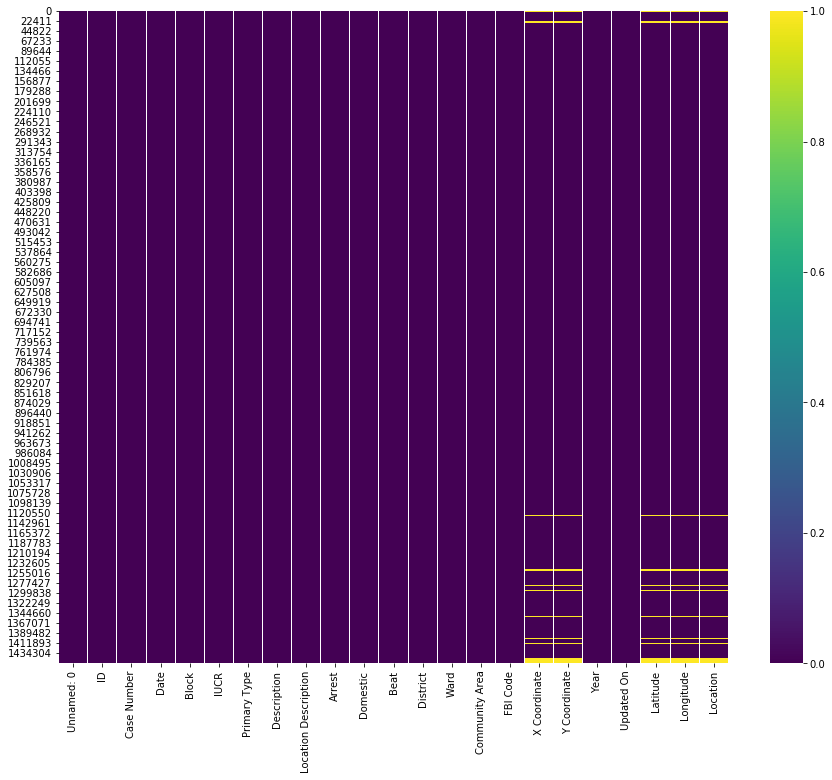

In [13]:
#drawing in the heatmap for seeing the amount of null values present in the data
plt.figure(figsize = (15, 12))
sns.heatmap(data.isnull(), cmap = 'viridis')

In [14]:
#removing the null values
data = data.dropna()

#removing the unnecessary data for the notebook
data = data.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [15]:
#checking top 15 location where crimes had happeened
data['Location Description'].value_counts().iloc[:15]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
Name: Location Description, dtype: int64

In [16]:
#checking top 15 types of crimes which had happeened
data['Primary Type'].value_counts().iloc[:15]

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
PROSTITUTION                    7567
Name: Primary Type, dtype: int64

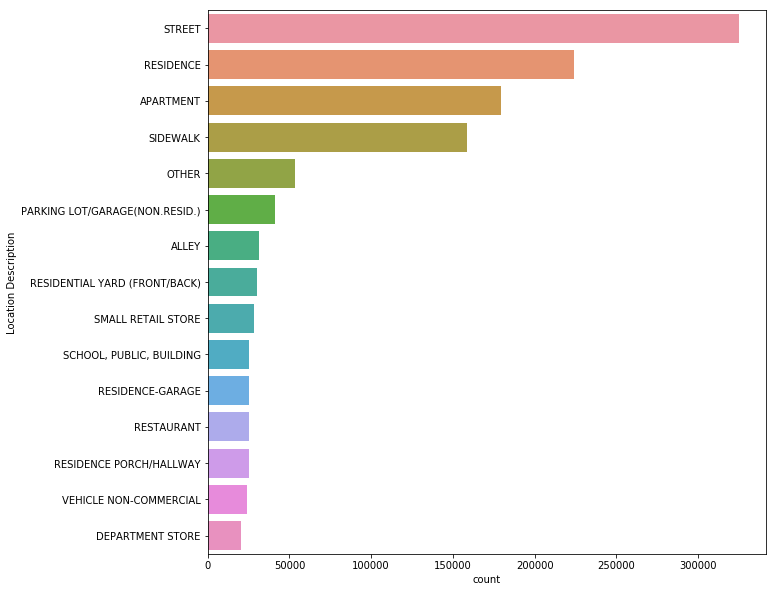

In [17]:
#plotting top 15 location 
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:15].index)

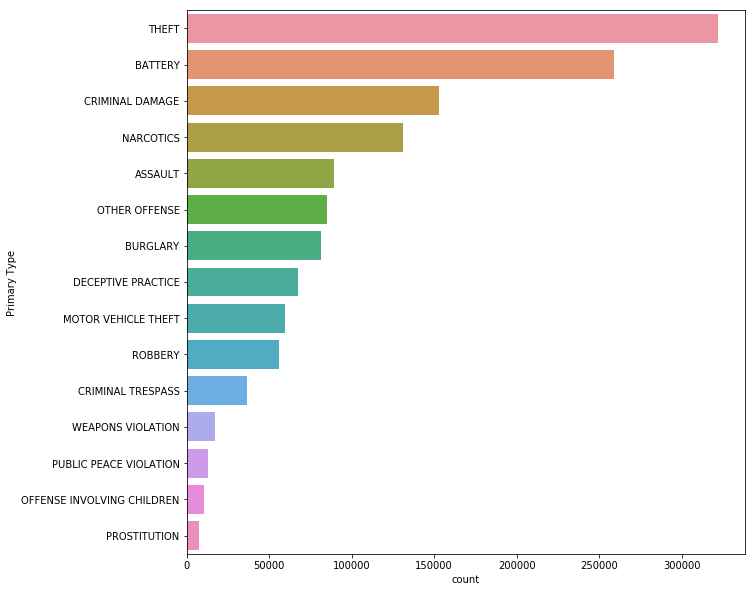

In [18]:
#plotting top 15 crime types
plt.figure(figsize = (10, 10))
sns.countplot(y = 'Primary Type', data = data, order = data['Primary Type'].value_counts().iloc[:15].index)

In [19]:
#grouping the data according to community area
location = data.groupby('Community Area').first()
location.head()

,Date,Primary Type,Description,Location Description,Arrest,Year,Latitude,Longitude,Location
Community Area,,,,,,,,,
0.0,02/19/2012 06:54:00 PM,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,2012,41.799090,-87.790549,"(41.799089601, -87.790549465)"
1.0,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
2.0,05/03/2016 10:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,2016,41.999731,-87.705810,"(41.99973106, -87.705809711)"
3.0,05/03/2016 09:35:00 PM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,2016,41.972843,-87.671127,"(41.972843435, -87.671127232)"
4.0,05/04/2016 12:01:00 AM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,2016,41.981316,-87.695119,"(41.9813162, -87.695118674)"


In [20]:
#extracting 4 features from the location dataframe i.e. Latitude, Longitude, Location Description, Arrest
new_location = location.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_location.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [22]:
#creating the map for plotting the latitude and longitude in the Map
chicago_map = folium.Map(location = [41.799090, -87.790549], zoom_start = 10, tiles = 'CartoDB dark_matter')
chicago_map

In [23]:
#extracting the latitude and longitude and plotting them on Map 
for i in range(len(new_location)):
    
    #taking out latitude
    lat = new_location['Latitude'][i]
    
    #taking out latitude
    long = new_location['Longitude'][i]
    
    #popup text which when clicked on map will following three things on that particular location i.e. Community Index, Arrest, Location Description
    popup_text = """Community Index : {}<br><br>
                Arrest : {}<br><br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_location.index[i],
                               new_location.iloc[i][-1],
                               new_location.iloc[i][-2]
                               )
    
    #drawing the circles of radius 6 on map to show the location where the crime had happened
    folium.CircleMarker(location = [lat, long], radius = 6, popup = popup_text, fill = True).add_to(chicago_map)
    
#seeing the output map
chicago_map

In [25]:
#extracting out location which is our interest
unique_location = data['Location'].value_counts()
unique_location.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.979006297, -87.906463155)', '(41.897895128, -87.624096605)',
       '(41.742710224, -87.634088181)', '(41.909664252, -87.742728815)',
       '(41.896888586, -87.628203192)', '(41.885487535, -87.726422045)',
       '(41.868541914, -87.639235361)', '(41.976290414, -87.905227221)',
       ...
       '(41.866323736, -87.770471792)', '(41.842978054, -87.626898056)',
       '(41.914228052, -87.663268495)', '(41.982905084, -87.660047852)',
       '(41.945113469, -87.78634626)', '(41.695503617, -87.713173386)',
       '(41.782225677, -87.58787183)', '(41.847381722, -87.735491784)',
       '(41.746489946, -87.621261858)', '(41.794695084, -87.593294167)'],
      dtype='object', length=368079)

In [26]:
#creating a new dataframe which consists of latitude and longitude and sorted according the number of crimes happened on that location
new_unique_location = pd.DataFrame({'Raw String' : unique_location.index, 'Values Count': unique_location})
new_unique_location.index = range(len(unique_location))
new_unique_location.head()

,Raw String,Values Count
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [27]:
#as our locatioin is in form of string so creating a function for extracing out the latitude and longitude
def location_extractor(string):
    
    values = string[1:-1].split(',')
    lat, long = values[0], values[1]
    
    return lat, long

In [28]:
#creating the new dataframe which comsists of the latitude and longitude in sorted on the basis of the number of crimes had happened
new_unique_location['Location Coord'] = new_unique_location['Raw String'].apply(location_extractor)
new_unique_location = new_unique_location.drop('Raw String', axis = 1)
new_unique_location.head()

,Values Count,Location Coord
0,2093,"(41.883500187, -87.627876698)"
1,2082,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1319,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [29]:
#creating a new map
chicago_crime_map = folium.Map(location = [41.883500187, -87.627876698], zoom_start = 10, tiles = 'CartoDB dark_matter')
chicago_crime_map

In [33]:
%%time 
#for showing the time taken to draw the location on the map


#plotting circles on map a larger and red circle represent large number of crimes while a smaller blue circle represent the less number of crimes
for i in range(500):
    
    #extracting latitude
    lat = float(new_unique_location['Location Coord'].iloc[i][0])
    
    #extracting longitude
    long = float(new_unique_location['Location Coord'].iloc[i][1])
    
    #making radius dynamic on the basis of number of crimes
    radius = float(new_unique_location['Values Count'].iloc[i]) / 40
    
    # if number of crimes are more than 1000 then circle will be red in color else blue in color 
    if float(new_unique_location["Values Count"].iloc[i]) > 1000:
        color = '#FF4500'
    else:
        color = '#008080'
        
    #creating the popup text which will show Latitude, Longitude and Number of crimes happened on place when clicked on Map
    popup_text = """Latitude : {}<br><br>
                    Longitude : {}<br><br>
                    No of Crime Incident : {}<br><br>"""
    
    popup_text = popup_text.format(lat, long, new_unique_location['Values Count'][i])
    
    
    #drawing circles on map with different color and dynamic radius
    folium.CircleMarker(location = [lat, long], radius = radius, color = color, popup = popup_text, fill = True).add_to(chicago_crime_map)

CPU times: user 140 ms, sys: 4 ms, total: 144 ms
Wall time: 201 ms


In [34]:
chicago_crime_map

In [35]:
#extracting crimes which are theft and doing analysis on them
data_theft = data[data['Primary Type'] == 'THEFT']
data_theft.head()

,Date,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
12,05/03/2016 05:30:00 PM,THEFT,FROM BUILDING,OTHER,False,28.0,2016,41.877812,-87.655758,"(41.877811861, -87.655758012)"
13,05/03/2016 09:00:00 AM,THEFT,$500 AND UNDER,STREET,False,35.0,2016,41.843017,-87.617227,"(41.843016958, -87.61722727)"
14,05/03/2016 10:08:00 PM,THEFT,OVER $500,STREET,False,24.0,2016,41.910901,-87.686019,"(41.910900826, -87.686018747)"
16,05/03/2016 09:45:00 PM,THEFT,OVER $500,STREET,False,24.0,2016,41.908237,-87.678437,"(41.908237096, -87.678437417)"


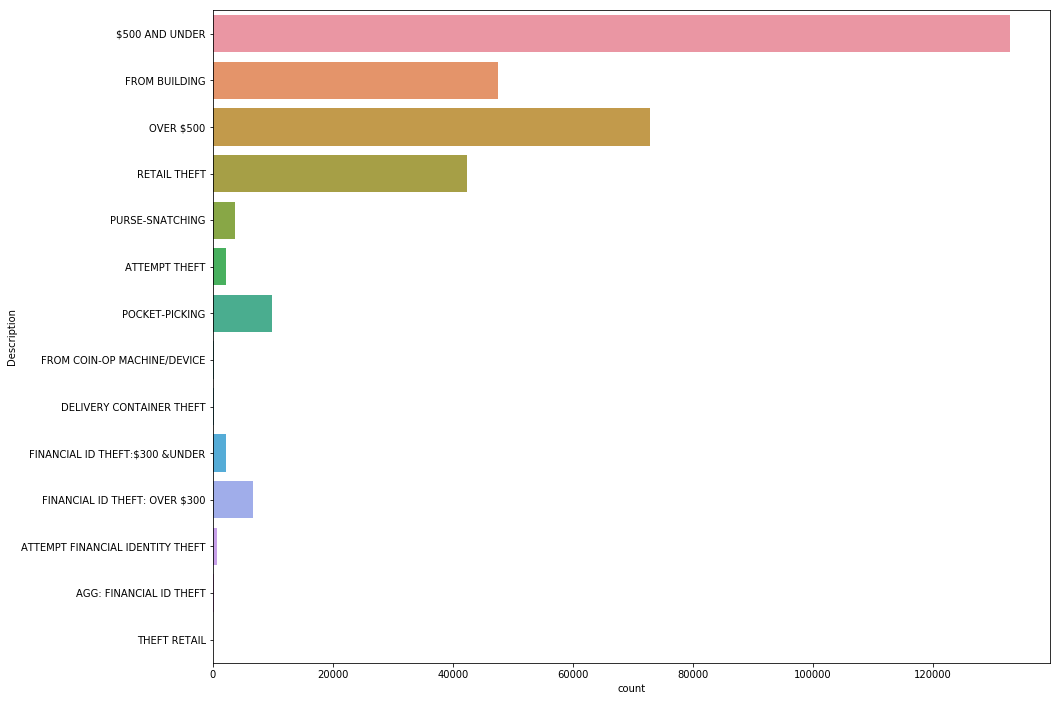

In [37]:
#drawing the countplot for showing description of theft which had happened 
plt.figure(figsize = (15, 12))
sns.countplot(y = data_theft['Description'])

In [38]:
#creating a new dataframe which consists of description sorted on the basis of their number
new_data_theft = pd.DataFrame({'Counts' : data_theft['Description'].value_counts(), 'Description' : data_theft['Description'].value_counts().index})
new_data_theft.reset_index(inplace=True)
new_data_theft = new_data_theft.drop(columns = ['index'], axis = 1)
new_data_theft.head()

,Counts,Description
0,132848,$500 AND UNDER
1,72957,OVER $500
2,47527,FROM BUILDING
3,42450,RETAIL THEFT
4,9910,POCKET-PICKING


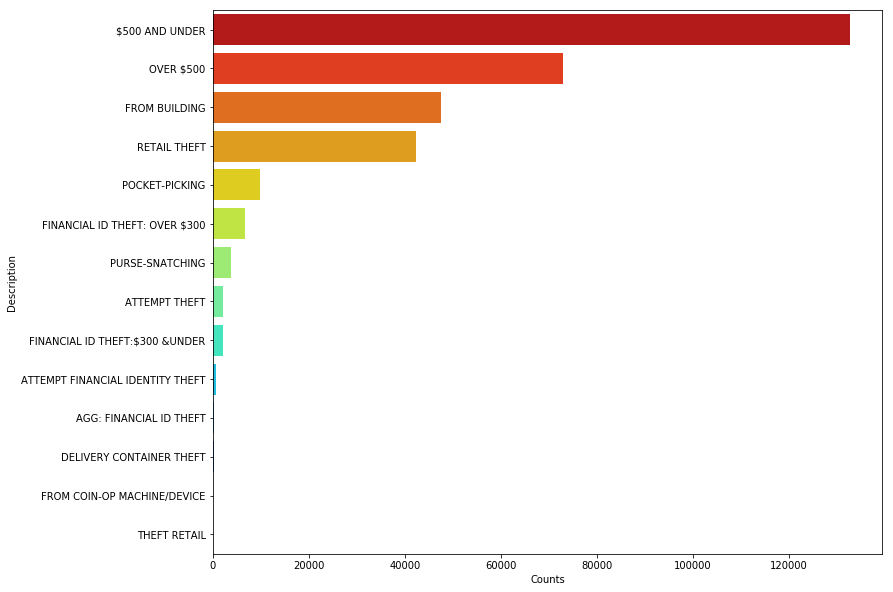

In [40]:
#drawing the bar plot with description on y axis while number of times that happened on x axis
plt.figure(figsize = (12, 10))
sns.barplot(y = 'Description', x = 'Counts', data = new_data_theft, palette="jet_r")

In [41]:
%%time
#converting the data into python readable format
data_theft['Date'] = pd.to_datetime(data_theft['Date'])
data_theft.head()

CPU times: user 1min 3s, sys: 8 ms, total: 1min 3s
Wall time: 1min 3s


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
#extracting the month from the date and doing analysis on number of crimes happened on particular month
data_theft['Month'] = data_theft['Date'].apply(lambda x : x.month)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
#creating dataframe which consists of 12 month and the number of crimes happened on that month 
crime_month = pd.DataFrame({'Crime Count' : data_theft['Month'].value_counts(), 'Month' : data_theft['Month'].value_counts().index})
crime_month = crime_month.sort_values(['Month'], ascending = True)
crime_month.reset_index(inplace = True)
crime_month = crime_month.drop(columns = ['index'], axis = 1)
crime_month

,Crime Count,Month
0,24188,1
1,20347,2
2,24139,3
3,25220,4
4,27630,5
5,29083,6
6,31425,7
7,31238,8
8,29039,9
9,28556,10


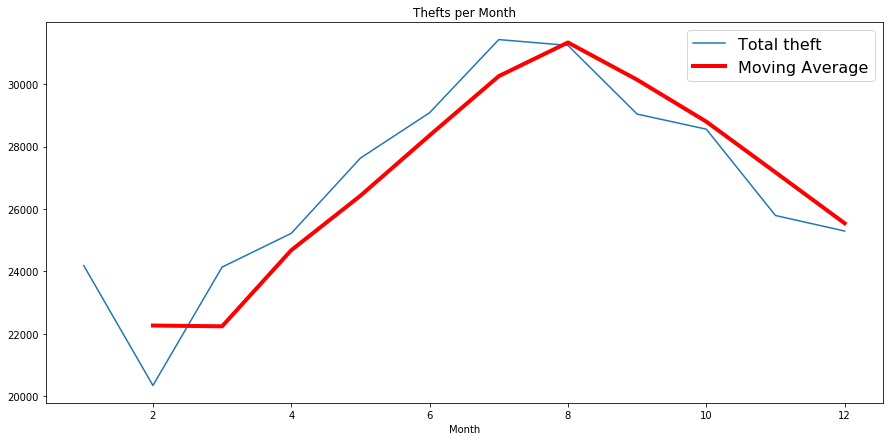

In [44]:
#plotting the trends of crimes happening in each month
plt.figure(figsize = (15, 7))
plt.plot(crime_month['Month'], crime_month['Crime Count'], label = 'Total theft')
plt.plot(crime_month['Month'], crime_month['Crime Count'].rolling(window = 2).mean(), label = 'Moving Average', linewidth = 4, color = 'red')

plt.title('Thefts per Month')
plt.legend(prop = {'size' : 16})
plt.xlabel('Month')
plt.show();

In [45]:
#resampling the data on DAY('D') basis and taking the mean and standard deviation of the data for plotting purpose
data_theft_dates = data_theft['Location']
data_theft_dates.index = data_theft['Date']
resampled = data_theft_dates.resample('D')
data_theft_dates['MEAN'] = resampled.size().mean()
data_theft_dates['STD'] = resampled.size().std()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: Sett

In [46]:
#calculating the Upper Chart Limit(UCL) and Lower Chart Limit(LCL)
UCL = data_theft_dates['MEAN'] + 3 * data_theft_dates['STD']
LCL = data_theft_dates['MEAN'] -  3 * data_theft_dates['STD']

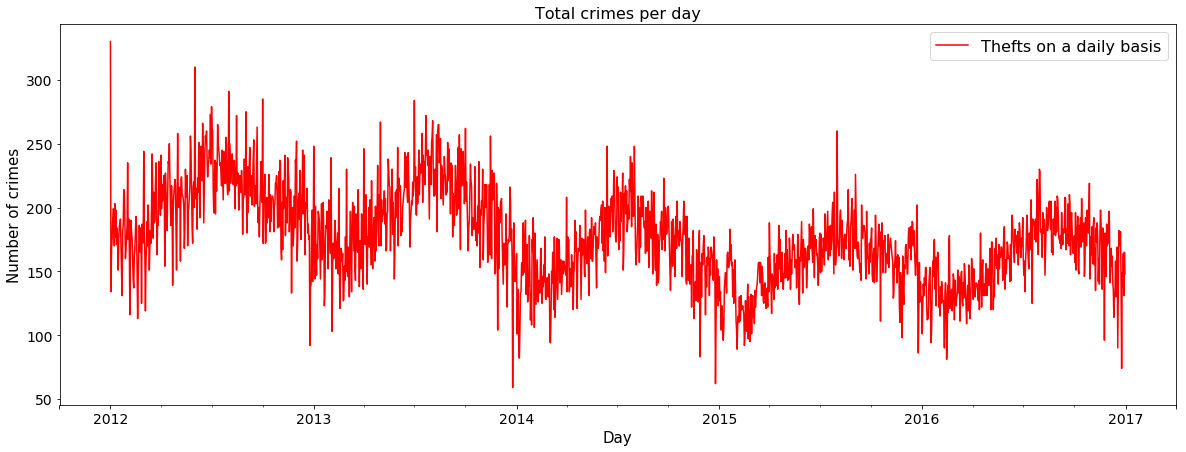

CPU times: user 460 ms, sys: 208 ms, total: 668 ms
Wall time: 464 ms


In [47]:
%%time

#plotting the data on crimes happening on daily basis
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
plt.title('Total crimes per day', fontsize=16)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Number of crimes', fontsize = 15)
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})
plt.show()